In [410]:
import plotly.express as px
import streamlit as st
import pandas as pd 
import altair as alt
import numpy as np
from PIL import Image
import emoji


# Importing first dataframe

In [411]:
data = pd.read_csv('data.csv')
data = data[['Country', 'Continent', 'variant_grouped', 'num_sequences_total', 'date', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']]
#a = data[(data.location=='Norway') & (data.num_sequences_total.unique())]
#data[(data.location=='Norway') & (data.country==bo)]
data.head()

/var/folders/rf/s3m6tj6n4s1fnhynkdw0gbm40000gn/T/ipykernel_49613/2563494128.py:1: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



Country      Continent variant_grouped  num_sequences_total        date  \
0  Argentina  South America           Alpha                  151  2020-05-11   
1  Argentina  South America             B.1                  151  2020-05-11   
2  Argentina  South America           B.1.1                  151  2020-05-11   
3  Argentina  South America            Beta                  151  2020-05-11   
4  Argentina  South America           Delta                  151  2020-05-11   

   Infant mortality (per 1000 births)  GDP ($ per capita)  
0                               15.18             11200.0  
1                               15.18             11200.0  
2                               15.18             11200.0  
3                               15.18             11200.0  
4                               15.18             11200.0

I just want the total number of cases per country

In [412]:
# Drop the variant
data = data.drop('variant_grouped', axis=1)

#data = data.groupby(['Country', 'date', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)']).first()[['num_sequences_total']].sum()
#data = data.groupby(['Country',]).first().groupby(['Country'])[['num_sequences_total']].sum()

# I split the two info 
cases = data.groupby(['Country', 'Continent']).sum().num_sequences_total.reset_index().drop(["Country", "Continent"], axis =1)
info = pd.DataFrame(data.groupby(['Country',"Continent"]).first().drop(["num_sequences_total","date"],axis = 1)).reset_index()
# Concat back
data = pd.concat([info,cases], axis=1)
data.head()

Country      Continent  Infant mortality (per 1000 births)  \
0     Angola         Africa                              191.19   
1  Argentina  South America                               15.18   
2      Aruba  North America                                5.89   
3  Australia        Oceania                                4.69   
4    Austria         Europe                                4.66   

   GDP ($ per capita)  num_sequences_total  
0              1900.0                16880  
1             11200.0               134576  
2             28000.0                48000  
3             29000.0               755184  
4             30000.0               201280

In [95]:
# Rounding up and renaming  
#data['num_sequences_total']=data['num_sequences_total'].apply(lambda x: round(x, 1))
#data['Total Cases per Capita']=data['Total Cases per Capita'].apply(lambda x: round(x, 7))
#data = data.rename(columns={'num_sequences_total':'Total n. of cases'})



continent  country  tot n. of cases  \
64815  North America  Jamaica                7   
65103           Asia   Kuwait                3   
65439           Asia  Vietnam               50   
65679         Europe   Monaco                1   
65903         Africa    Benin               57   

       Infant mortality (per 1000 births)  GDP ($ per capita)  \
64815                               12.36              3900.0   
65103                                9.95             19000.0   
65439                               25.95              2500.0   
65679                                5.43             27000.0   
65903                               85.00              1100.0   

       Total Cases per Capita  Population  num_sequences_total  
64815                     0.0     2758124            1660760.1  
65103                     0.0     2418393            1555118.3  
65439                     0.0    84402966            9187108.7  
65679                     0.0       32543             180396.8  
65903                     0.0     7862944            2804094.1

In [414]:
# Cleaning formatting
data = data.rename(columns={'num_sequences_total':'Tot number of cases'})
data.to_csv('data_gdp.csv')

# Visualizing 

In [19]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math


In [422]:
# Importing GDP vs Infant mortality dataframe
data = pd.read_csv('data_gdp.csv', index_col=0)
data.head()

Country      Continent  Infant mortality (per 1000 births)  \
0     Angola         Africa                              191.19   
1  Argentina  South America                               15.18   
2      Aruba  North America                                5.89   
3  Australia        Oceania                                4.69   
4    Austria         Europe                                4.66   

   GDP ($ per capita)  Tot number of cases  
0              1900.0                16880  
1             11200.0               134576  
2             28000.0                48000  
3             29000.0               755184  
4             30000.0               201280

In [423]:
# Plot 1

bubble_fig = px.scatter(data, x='Infant mortality (per 1000 births)', 
                                y='GDP ($ per capita)', 
                                color='Continent', 
                                title='GDP vs Infant Mortality & Covid Cases', 
                                size='Tot number of cases', 
                                log_x=True, 
                                hover_name="Country",  
                                hover_data=['GDP ($ per capita)', 'Infant mortality (per 1000 births)'],
                                size_max=70)

                                
#bubble_fig.update_layout(hovermode='closest')
bubble_fig.show()
# hovertemplaye=None
# hovermode="x unified"


In [424]:
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [425]:
# Remove unuseful columns
df = df[['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'countryterritoryCode', 'continentExp']]
# Rename columns
df = df.rename(columns={
    'dateRep': 'date',
    'countriesAndTerritories': 'country',
    'countryterritoryCode': 'countryCode',
    'continentExp': 'continent'
})
# Convert string to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
# Preview the data frame
df.sample(10)
df.head()

date  cases  deaths      country countryCode continent
0 2020-12-14    746       6  Afghanistan         AFG      Asia
1 2020-12-13    298       9  Afghanistan         AFG      Asia
2 2020-12-12    113      11  Afghanistan         AFG      Asia
3 2020-12-11     63      10  Afghanistan         AFG      Asia
4 2020-12-10    202      16  Afghanistan         AFG      Asia

In [277]:
df.tail()

date  cases  deaths   country countryCode continent
61895 2020-03-25      0       0  Zimbabwe         ZWE    Africa
61896 2020-03-24      0       1  Zimbabwe         ZWE    Africa
61897 2020-03-23      0       0  Zimbabwe         ZWE    Africa
61898 2020-03-22      1       0  Zimbabwe         ZWE    Africa
61899 2020-03-21      1       0  Zimbabwe         ZWE    Africa

In [286]:
from datetime import datetime
# Get today as string
today = datetime.now().strftime('%Y-%m-%d')
# Get a data frame only for today
df_today = df[df.date == '2020-03-25']
# Preview the data frame
df_today.head()

date  cases  deaths      country countryCode continent
264  2020-03-25      2       0  Afghanistan         AFG      Asia
604  2020-03-25     23       1      Albania         ALB    Europe
885  2020-03-25     34       2      Algeria         DZA    Africa
1230 2020-03-25     31       0      Andorra         AND    Europe
1506 2020-03-25      0       0       Angola         AGO    Africa

In [338]:
# Plot 2 

fig = px.scatter_geo(
    df_today, 
    locations='countryCode',
    color='continent',
    projection='orthographic',
    hover_name='country',
    size='cases',
    projection="natural earth",
    title=f'World COVID-19 Cases for {today}',
)
fig.show()


# let's add the sliding bar

In [320]:
#df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [426]:
# Sort the data frame on date
df = df.sort_values(by=['date'])

In [427]:
# Convert date to string type
df['date'] = df.date.dt.strftime('%Y%m%d')
# Some countries does not have code, let's drop all the invalid rows
df = df.dropna()
# Preview the data frame
df.head(10)

date  cases  deaths             country countryCode continent
28134  20191231      0       0                Iraq         IRQ      Asia
40527  20191231      0       0         Netherlands         NLD    Europe
29098  20191231      0       0              Israel         ISR      Asia
41137  20191231      0       0         New_Zealand         NZL   Oceania
16807  20191231      0       0  Dominican_Republic         DOM   America
43310  20191231      0       0                Oman         OMN      Asia
42357  20191231      0       0     North_Macedonia         MKD    Europe
42966  20191231      0       0              Norway         NOR    Europe
18657  20191231      0       0             Estonia         EST    Europe
22229  20191231      0       0             Germany         DEU    Europe

In [428]:
# Taking care of outliers
df['cases'] = df['cases'].abs()
df['deaths'] = df['deaths'].abs()
df.to_csv('cases_evolution.csv')
df.head()

date  cases  deaths             country countryCode continent
28134  20191231      0       0                Iraq         IRQ      Asia
40527  20191231      0       0         Netherlands         NLD    Europe
29098  20191231      0       0              Israel         ISR      Asia
41137  20191231      0       0         New_Zealand         NZL   Oceania
16807  20191231      0       0  Dominican_Republic         DOM   America

In [17]:
import plotly.io as pio
#pio.renderers.default = 'notebook_connected'
df = pd.read_csv('cases_evolution.csv', index_col=0)
df.head()

date  cases  deaths             country countryCode continent
28134  20191231      0       0                Iraq         IRQ      Asia
40527  20191231      0       0         Netherlands         NLD    Europe
29098  20191231      0       0              Israel         ISR      Asia
41137  20191231      0       0         New_Zealand         NZL   Oceania
16807  20191231      0       0  Dominican_Republic         DOM   America

In [20]:
fig = px.scatter_geo(
    df, 
    locations='countryCode',
    color='continent',
    hover_name='country',
    projection='orthographic',
    size='cases',
    title=f'World COVID-19 Cases - Evolution Over Time',
    animation_frame="date"
)
fig.show()

# Graph 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime



df = pd.read_csv('Transformed.csv')
df.head()


Continent location        date     month        variant variant_grouped  \
0    Europe   Norway  23/11/2020  November          Kappa           Kappa   
1    Europe   Norway  23/11/2020  November         Lambda          Lambda   
2    Europe   Norway  23/11/2020  November             Mu              Mu   
3    Europe   Norway  23/11/2020  November        Omicron         Omicron   
4    Europe   Norway  23/11/2020  November  S:677H.Robin1           S:677   

   num_sequences  perc_sequences  num_sequences_total  
0              0             0.0                  163  
1              0             0.0                  163  
2              0             0.0                  163  
3              0             0.0                  163  
4              0             0.0                  163

In [2]:

def date_change(date_str):
  format_str = '%d/%m/%Y' # The format
  datetime_obj = datetime.datetime.strptime(date_str, format_str)
  # print(datetime_obj.date())
  return datetime_obj.date()

df["date2"] = df["date"].apply(date_change)

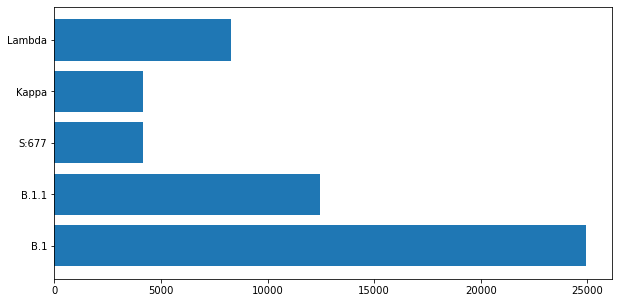

In [3]:
# create dataset
height = df["variant_grouped"].value_counts()[:5].sort_index() 
bars = df["variant_grouped"].value_counts()[:5].index.tolist()
y_pos = np.arange(len(bars))
 
fig = plt.figure(figsize=(10, 5))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show(fig)


# Graph 2 

In [4]:
import pandas as pd
import altair as alt

# Disable default datapoints limit in Altair
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [5]:


def graph2(data):
  '''
  Expects data.csv or its subsets as input
  Returns the graph showing cumulative cases by variant over time
  '''

  # Data manipulation: cumulative counts of cases by date and variant
  cumsum_variant = data.groupby(["variant_grouped", "date"])["num_sequences"].sum().groupby(level=0).cumsum().reset_index()
  cumsum_variant.columns = ["Variant", "date", "Cumulative Cases"]

  # Define interaction
  click = alt.selection_single(encodings=['color'], on="mouseover")

  # Create plot
  graph = alt.Chart(cumsum_variant).mark_area(
      opacity=0.7,
      interpolate='basis',
      line=True).properties(
      title='Cumulative Cases by Variant over time').encode(
      x=alt.X("date:T",
          title=None),
      y=alt.Y("Cumulative Cases:Q"),
      color=alt.Color('Variant:N',
          scale=alt.Scale(scheme='category20c')),
      tooltip = [alt.Tooltip('Variant:N')],
      opacity = alt.condition(click, alt.value(0.9), alt.value(0.1))
  ).add_selection(
      click
  )
  
  return graph


In [15]:
data = pd.read_csv('data.csv')
data.drop('Climate', 1, inplace=True)
data.head()

/var/folders/rf/s3m6tj6n4s1fnhynkdw0gbm40000gn/T/ipykernel_72741/2861061326.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')
/var/folders/rf/s3m6tj6n4s1fnhynkdw0gbm40000gn/T/ipykernel_72741/2861061326.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('Climate', 1, inplace=True)


Unnamed: 0        date variant_grouped  num_sequences  perc_sequences  \
0           0  2020-05-11           Alpha              0             0.0   
1           1  2020-05-11             B.1              0             0.0   
2           2  2020-05-11           B.1.1              0             0.0   
3           3  2020-05-11            Beta              0             0.0   
4           4  2020-05-11           Delta              0             0.0   

   num_sequences_total    Country      Continent  Population  Area (sq. mi.)  \
0                  151  Argentina  South America    39921833         2766890   
1                  151  Argentina  South America    39921833         2766890   
2                  151  Argentina  South America    39921833         2766890   
3                  151  Argentina  South America    39921833         2766890   
4                  151  Argentina  South America    39921833         2766890   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Deathrate  \
0                               15.18             11200.0       7.55   
1                               15.18             11200.0       7.55   
2                               15.18             11200.0       7.55   
3                               15.18             11200.0       7.55   
4                               15.18             11200.0       7.55   

   Cases per Capita  Total Cases per Capita  
0               0.0                0.000004  
1               0.0                0.000004  
2               0.0                0.000004  
3               0.0                0.000004  
4               0.0                0.000004

In [16]:
graph2(data)

alt.Chart(...)

# Graph 3

In [11]:


def graph3(data):
  '''
  Expects data.csv or its subsets as input
  Returns the graph showing cumulative cases by variant over time
  '''

  # Data manipulation: cumulative counts of cases by date and variant
  sum_variant = data.groupby(["variant_grouped", "date"])["num_sequences"].sum().reset_index()
  sum_variant.columns = ["Variant", "date", "Cases"]

  # Define interaction
  click = alt.selection_single(encodings=['color'], on="mouseover")

  # Create plot
  graph = alt.Chart(sum_variant).mark_area(
    opacity=0.7,
    interpolate='basis',
    line=True).properties(
    title='Cases by Variant over time').encode(
    x=alt.X("date:T", title=None),
    y=alt.Y("Cases:Q", stack=None),
    color=alt.Color('Variant:N', scale=alt.Scale(scheme='category20c')),
    tooltip = [alt.Tooltip('Variant:N')],
    opacity = alt.condition(click, alt.value(0.9), alt.value(0.1))
  ).add_selection(
    click
  )
  
  return graph


In [12]:
graph3(data)

alt.Chart(...)